In [1]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
from tools import *
import statsmodels.api as sm 
plt.figure(figsize=(20, 16))
%matplotlib inline

In [50]:
df = get_data('house_data_30min')
df_train, df_test = df[:-4], df[-4:]
df_test.tail()

,Ph,Te,Isol
t,,,
2013-02-08 13:05:00,42.0,2.253500,375.460368
2013-02-08 13:35:00,10.0,3.259167,751.789858
2013-02-08 14:05:00,30.0,2.946167,371.692539
2013-02-08 14:35:00,62.4,2.438000,134.627713


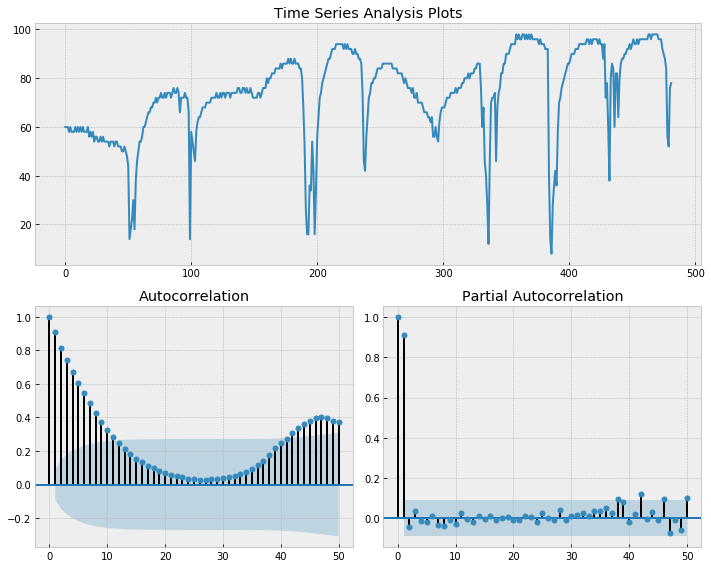

In [85]:
tsplot((df_train['Ph'].values), lags=50)

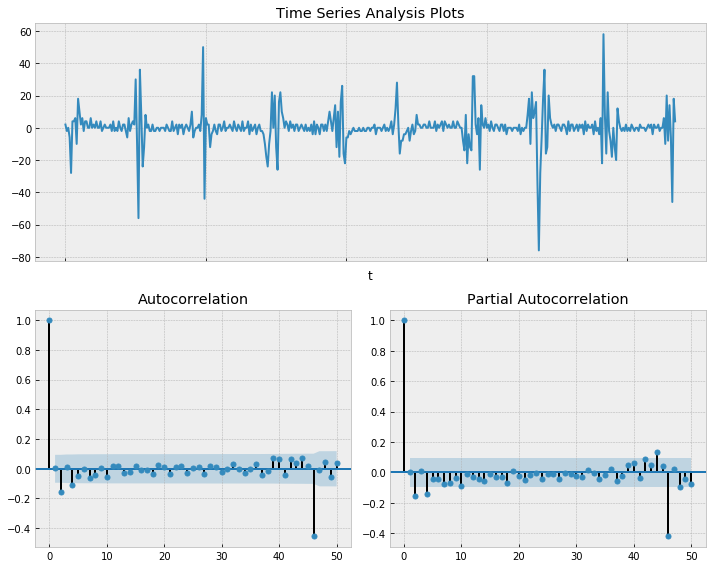

In [86]:
tsplot(df_train['Ph'].diff(1).diff(46).dropna(), lags=50)

In [188]:
aics = []
bics = []
for n in range(1, 80):
    mod = sm.tsa.statespace.SARIMAX(df_train['Ph'].values, trend='n', order=(2,1,0), seasonal_order=(1,0,0,n))
    results = mod.fit()
#     tsplot(results.resid, lags=200)
    print(results.aic)
    aics.append(results.aic)
    print(results.bic)
    bics.append(results.bic)

3326.013272530506
3342.716741610929
3326.4791790651
3343.182648145523
3325.8636840970967
3342.5671531775197
3326.194403525428
3342.897872605851
3325.3348996919212
3342.0383687723443
3326.494310064675
3343.197779145098
3326.5280951664395
3343.2315642468625
3325.980388960813
3342.683858041236
3326.438694048986
3343.142163129409
3324.697250812056
3341.400719892479
3326.0072453809544
3342.7107144613774
3326.461363604433
3343.164832684856
3325.782070004465
3342.485539084888
3326.3283884168586
3343.0318574972816
3326.0579473854023
3342.7614164658253
3326.4874113100723
3343.1908803904953
3326.2676984493983
3342.9711675298213
3326.382133816225
3343.085602896648
3326.4907490241603
3343.1942181045833
3326.520202223668
3343.223671304091
3326.3173187172492
3343.0207877976723
3326.3820366864197
3343.0855057668427
3326.482622618445
3343.186091698868
3326.0206139000857
3342.7240829805087
3326.5013673591193
3343.2048364395423
3326.515934878198
3343.219403958621
3325.686882231239
3342.390351311662
3326

Text(0.5, 1.0, 'AIC and BIC scores over number of parameters')

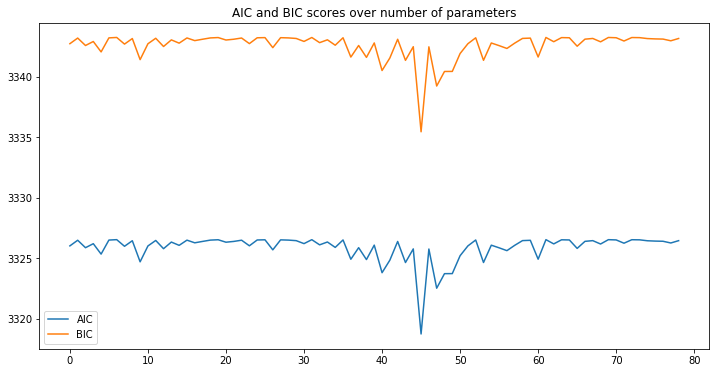

In [189]:
plt.plot(aics, label = 'AIC')
plt.plot( bics, label = 'BIC')
plt.legend()
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('AIC and BIC scores over number of parameters')

# mymodel

In [92]:
plt.rcParams['figure.figsize'] = [20, 10]
mod = sm.tsa.statespace.SARIMAX(df_train['Ph'].values, trend='n', order=(1,1,0), seasonal_order=(1,1,0,48))
results = mod.fit()

In [93]:
df_test.Ph.values

array([42. , 10. , 30. , 62.4])

In [94]:
results.forecast(4)

array([77.52119025, 87.22752606, 80.25812302, 93.74279613])

C:\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


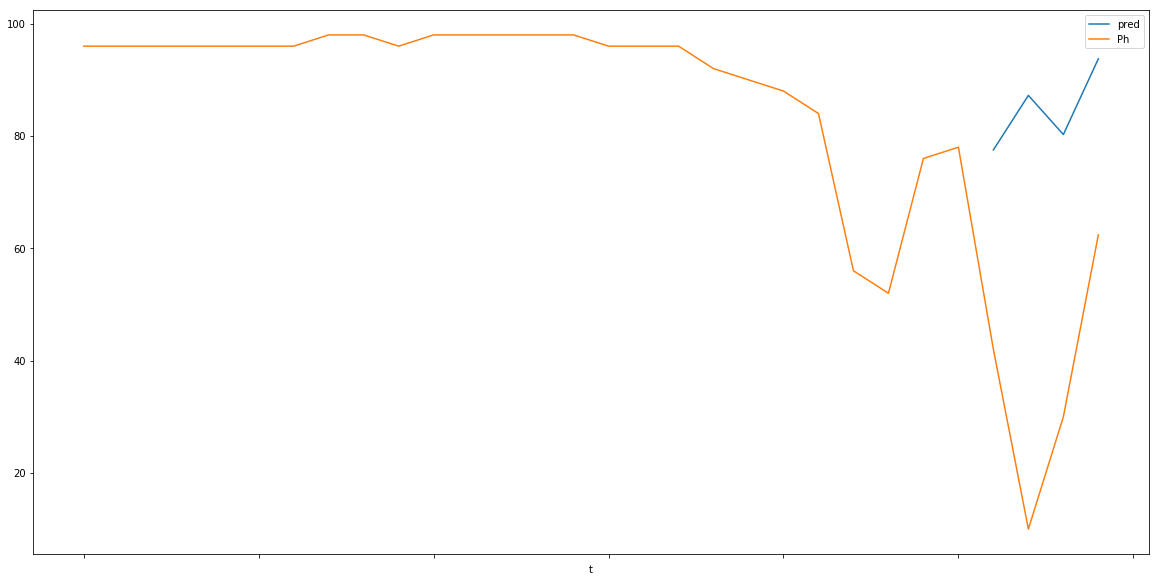

In [104]:
def predict_plot(n):
    preds = results.forecast(n)
    df_train['pred'] = np.nan
    df_test['pred'] = np.nan
    df_test['pred'].values[-n:] = preds 
    df = pd.concat([df_train, df_test])
    df[['pred', 'Ph']][-30:].plot()

predict_plot(4)

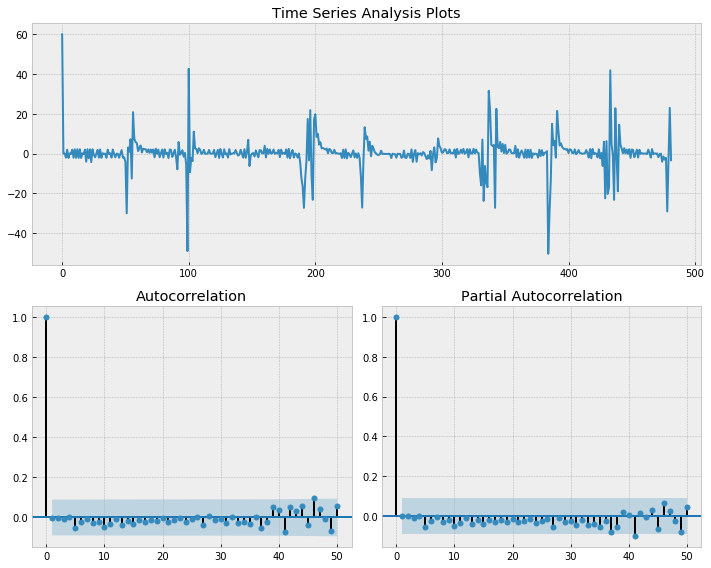

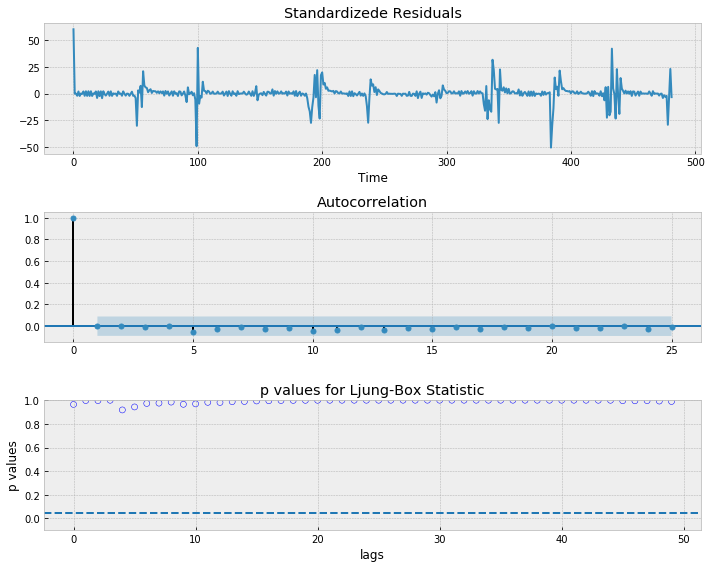

In [209]:
tsplot(results.resid, lags=50)
tsdiag(results.resid, lbLags=50)

In [66]:
results.polynomial_seasonal_ar

array([ 1.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       , -0.0752148])

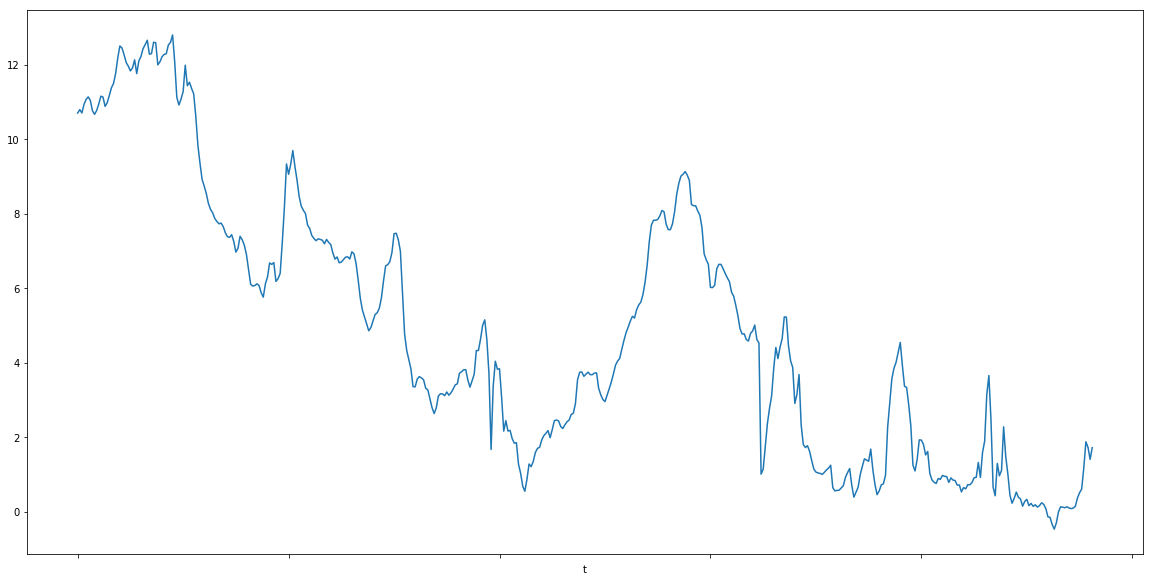

In [89]:
df_train['Te'].plot()

In [69]:

from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(df_train[['Ph']].values, exog=df_train[['Isol', 'Te']], order=(1, 1))
model_fit = model.fit(disp=False)

C:\Python36\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)


ValueError: Only gave one variable to VAR

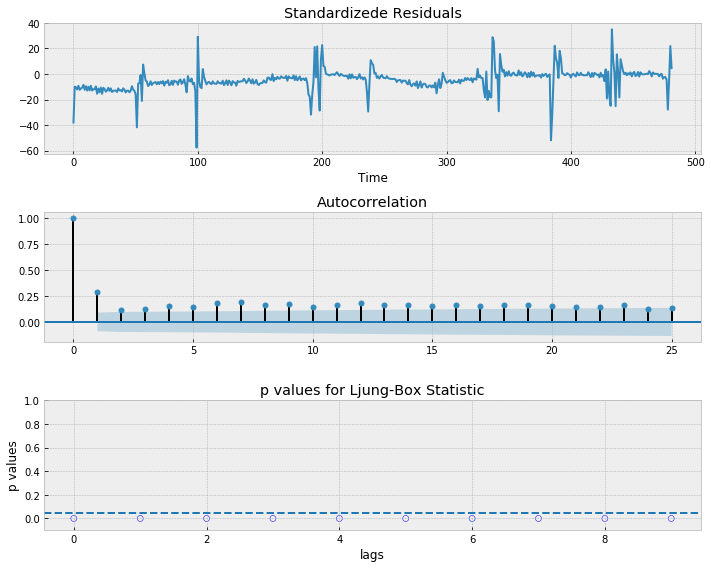

In [144]:
tsdiag(model_fit.resid.values[:,0])

In [140]:
result = model_fit
print(result.summary())

                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                  482
Model:                    VARMAX(1,1)   Log Likelihood               -2054.581
                          + intercept   AIC                           4139.162
Date:                Sat, 20 Apr 2019   BIC                           4201.831
Time:                        23:14:03   HQIC                          4163.792
Sample:                    01-29-2013                                         
                         - 02-08-2013                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):               436.69, 31.60   Jarque-Bera (JB):    1535.87, 11153.76
Prob(Q):                        0.00, 0.83   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.79, 2.34   Skew:                     -0.52, -2.40
Prob(H) (two-sided):            0.13,